<a href="https://colab.research.google.com/github/jecinth011/AI-LAB1-Jecinth/blob/main/KNNmultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

--- Multi-Class Dataset Preview ---
    Age  Income  Spending_Class
51   28   70080             1.0
55   33   49474             1.0
95   45   74698             1.0
33   28   29789             0.0
2    28   42361             0.0

Class Distribution:
Spending_Class
Budget      50
Moderate    50
Premium     50
Name: count, dtype: int64


KNN Model trained with k=7
Training Accuracy: 0.93
Test Accuracy: 0.93


Classification Report:
              precision    recall  f1-score   support

      Budget       1.00      1.00      1.00        19
    Moderate       0.86      0.92      0.89        13
     Premium       0.92      0.85      0.88        13

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45


Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  2 11]]


--- New Customer Predictions ---

Customer 1: Age=22, Income=$35,000
Predicted Class: Budget
Class Probabilities:
  Budget: 1.00

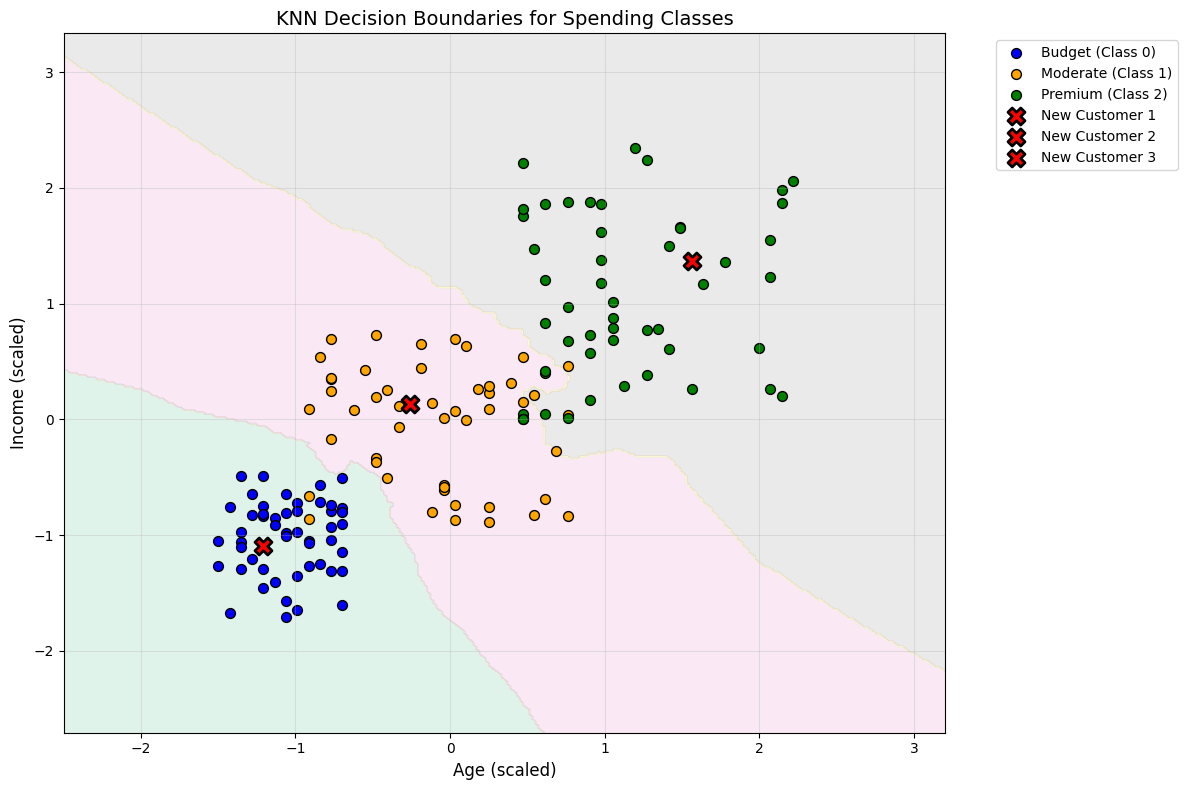



Analyzing Neighbors for Customer 2:
Age: 35, Income: $65,000
Predicted Class: Moderate

7 Nearest Neighbors:
1. Age: 20, Income: $49,723, Class: Budget, Distance: 0.08
2. Age: 20, Income: $38,047, Class: Budget, Distance: 0.15
3. Age: 42, Income: $40,197, Class: Moderate, Distance: 0.19
4. Age: 48, Income: $55,087, Class: Moderate, Distance: 0.22
5. Age: 19, Income: $43,276, Class: Budget, Distance: 0.30
6. Age: 26, Income: $63,938, Class: Moderate, Distance: 0.32
7. Age: 44, Income: $69,320, Class: Moderate, Distance: 0.37


In [3]:

np.random.seed(42)


data = {
    'Age': np.concatenate([
        np.random.randint(18, 30, 50),  # Young adults
        np.random.randint(25, 50, 50),  # Middle-aged
        np.random.randint(45, 70, 50)   # Seniors
    ]),
    'Income': np.concatenate([
        np.random.randint(20000, 50000, 50),  # Low income
        np.random.randint(40000, 80000, 50),  # Medium income
        np.random.randint(60000, 120000, 50)  # High income
    ]),
    'Spending_Class': np.concatenate([
        np.zeros(50),  # Class 0: "Budget" spenders
        np.ones(50),   # Class 1: "Moderate" spenders
        np.full(50, 2) # Class 2: "Premium" spenders
    ])
}

df = pd.DataFrame(data)
class_names = {0: 'Budget', 1: 'Moderate', 2: 'Premium'}

print("--- Multi-Class Dataset Preview ---")
print(df.sample(5))
print("\nClass Distribution:")
print(df['Spending_Class'].value_counts().rename(index=class_names))
print("\n" + "="*50 + "\n")


X = df[['Age', 'Income']].values
y = df['Spending_Class'].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print(f"KNN Model trained with k={knn.n_neighbors}")
print(f"Training Accuracy: {knn.score(X_train, y_train):.2f}")
print(f"Test Accuracy: {knn.score(X_test, y_test):.2f}")
print("\n" + "="*50 + "\n")

y_pred = knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names.values()))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n" + "="*50 + "\n")


new_customers = np.array([
    [22, 35000],  # Young with low income
    [35, 65000],  # Middle-aged with medium income
    [60, 95000]   # Senior with high income
])


new_customers_scaled = scaler.transform(new_customers)

predictions = knn.predict(new_customers_scaled)
probabilities = knn.predict_proba(new_customers_scaled)

print("--- New Customer Predictions ---")
for i, (age, income) in enumerate(new_customers):
    print(f"\nCustomer {i+1}: Age={age}, Income=${income:,}")
    print(f"Predicted Class: {class_names[predictions[i]]}")
    print("Class Probabilities:")
    for class_idx, prob in enumerate(probabilities[i]):
        print(f"  {class_names[class_idx]}: {prob:.2f}")

plt.figure(figsize=(12, 8))


x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))


Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.4, cmap='Pastel2')


colors = ['blue', 'orange', 'green']
for i, class_name in class_names.items():
    plt.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1],
               c=colors[i], s=50, edgecolor='k',
               label=f'{class_name} (Class {i})')


for i, (age, income) in enumerate(new_customers):
    plt.scatter(new_customers_scaled[i, 0], new_customers_scaled[i, 1],
               c='red', s=150, marker='X', edgecolor='k',
               linewidth=2, label=f'New Customer {i+1}')

plt.title('KNN Decision Boundaries for Spending Classes', fontsize=14)
plt.xlabel('Age (scaled)', fontsize=12)
plt.ylabel('Income (scaled)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


customer_idx = 1
distances, indices = knn.kneighbors([new_customers_scaled[customer_idx]])

print("\n" + "="*50)
print(f"\nAnalyzing Neighbors for Customer {customer_idx+1}:")
print(f"Age: {new_customers[customer_idx, 0]}, Income: ${new_customers[customer_idx, 1]:,}")
print(f"Predicted Class: {class_names[predictions[customer_idx]]}\n")

print("7 Nearest Neighbors:")
for i, (idx, dist) in enumerate(zip(indices[0], distances[0])):
    neighbor_age = X[idx, 0]
    neighbor_income = X[idx, 1]
    neighbor_class = class_names[y[idx]]
    print(f"{i+1}. Age: {neighbor_age}, Income: ${neighbor_income:,}, "
          f"Class: {neighbor_class}, Distance: {dist:.2f}")